In [23]:
import pandas as pd
import numpy as np
from prophet import Prophet
import yfinance

In [24]:
stock = "MSFT"
period = "5y"

In [25]:
historical_data =  yfinance.download(stock,period=period)[["Adj Close"]]
historical_data = historical_data.reset_index()
historical_data = historical_data.rename(columns={"Date":"ds","Adj Close":"y"})
historical_data


[*********************100%***********************]  1 of 1 completed


,ds,y
0,2018-01-08,83.134590
1,2018-01-09,83.078072
2,2018-01-10,82.701408
3,2018-01-11,82.946266
4,2018-01-12,84.377647
...,...,...
1253,2022-12-29,241.009995
1254,2022-12-30,239.820007
1255,2023-01-03,239.580002
1256,2023-01-04,229.100006


In [26]:
model = Prophet()
model.fit(historical_data)

14:14:43 - cmdstanpy - INFO - Chain [1] start processing
14:14:43 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
1618,2024-01-01
1619,2024-01-02
1620,2024-01-03
1621,2024-01-04
1622,2024-01-05


In [29]:
forecast = model.predict(future)
forecast["yhat"]

0        87.083754
1        86.546071
2        86.402636
3        85.794607
4        85.450443
           ...    
1618    142.428173
1619    141.654621
1620    141.213109
1621    140.242429
1622    139.470003
Name: yhat, Length: 1623, dtype: float64

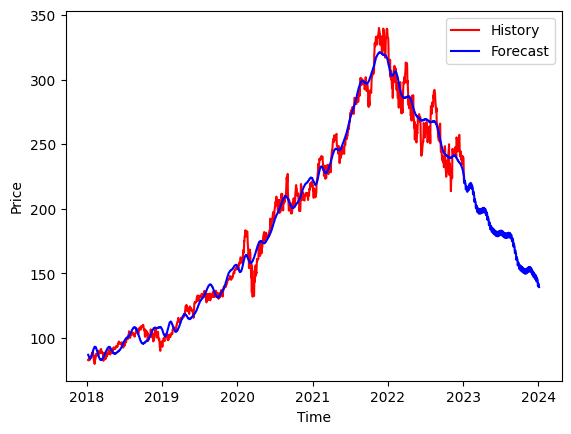

In [34]:
import matplotlib.pyplot as plt

plt.plot(historical_data["ds"],historical_data["y"],color="red",label="History")
plt.plot(forecast["ds"],forecast["yhat"],color="blue",label="Forecast")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [35]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-08,87.256666,76.471875,97.696906,87.256666,87.256666,-0.172912,-0.172912,-0.172912,0.780918,0.780918,0.780918,-0.953830,-0.953830,-0.953830,0.0,0.0,0.0,87.083754
1,2018-01-09,87.307843,75.242055,97.464729,87.307843,87.307843,-0.761772,-0.761772,-0.761772,0.771262,0.771262,0.771262,-1.533034,-1.533034,-1.533034,0.0,0.0,0.0,86.546071
2,2018-01-10,87.359021,76.100163,96.391692,87.359021,87.359021,-0.956385,-0.956385,-0.956385,1.125592,1.125592,1.125592,-2.081977,-2.081977,-2.081977,0.0,0.0,0.0,86.402636
3,2018-01-11,87.410198,74.871930,96.461029,87.410198,87.410198,-1.615591,-1.615591,-1.615591,0.976243,0.976243,0.976243,-2.591834,-2.591834,-2.591834,0.0,0.0,0.0,85.794607
4,2018-01-12,87.461375,75.285877,96.009109,87.461375,87.461375,-2.010932,-2.010932,-2.010932,1.043334,1.043334,1.043334,-3.054266,-3.054266,-3.054266,0.0,0.0,0.0,85.450443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618,2024-01-01,138.192459,104.750943,183.855196,101.637529,178.530373,4.235714,4.235714,4.235714,0.780918,0.780918,0.780918,3.454796,3.454796,3.454796,0.0,0.0,0.0,142.428173
1619,2024-01-02,137.956042,101.608633,183.741712,101.240486,178.385563,3.698579,3.698579,3.698579,0.771262,0.771262,0.771262,2.927317,2.927317,2.927317,0.0,0.0,0.0,141.654621
1620,2024-01-03,137.719625,101.939750,183.442360,100.857551,178.240754,3.493484,3.493484,3.493484,1.125592,1.125592,1.125592,2.367892,2.367892,2.367892,0.0,0.0,0.0,141.213109
1621,2024-01-04,137.483208,102.515005,183.644619,100.474616,178.206684,2.759221,2.759221,2.759221,0.976243,0.976243,0.976243,1.782978,1.782978,1.782978,0.0,0.0,0.0,140.242429
